In [1]:
import pandas as pd

In [4]:
diab = pd.read_csv('diabetes .csv')# Dropping null values
diab = diab.dropna()
diab.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Outcome
0,40,1,0,1,0,1.0,0.0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,8,1,0,0,0,1.0,0.0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41,1,1,0,0,1.0,1.0,0,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45,1,0,0,1,1.0,1.0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,1,1,1,1,1.0,1.0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
diab['Outcome'].value_counts()

1.0    320
0.0    200
Name: Outcome, dtype: int64

In [6]:
pd.options.display.float_format = '{:,.0f}'.format
diab

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Outcome
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,8,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [7]:
diab['Outcome'].value_counts()

1    320
0    200
Name: Outcome, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [10]:
X = diab.drop('Outcome',axis=1)
y = diab['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_over,y_over)

RandomForestClassifier()

In [11]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.9807692307692307


In [12]:
import joblib
joblib.dump(rf, 'diab_model.pkl') 

['diab_model.pkl']

In [13]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

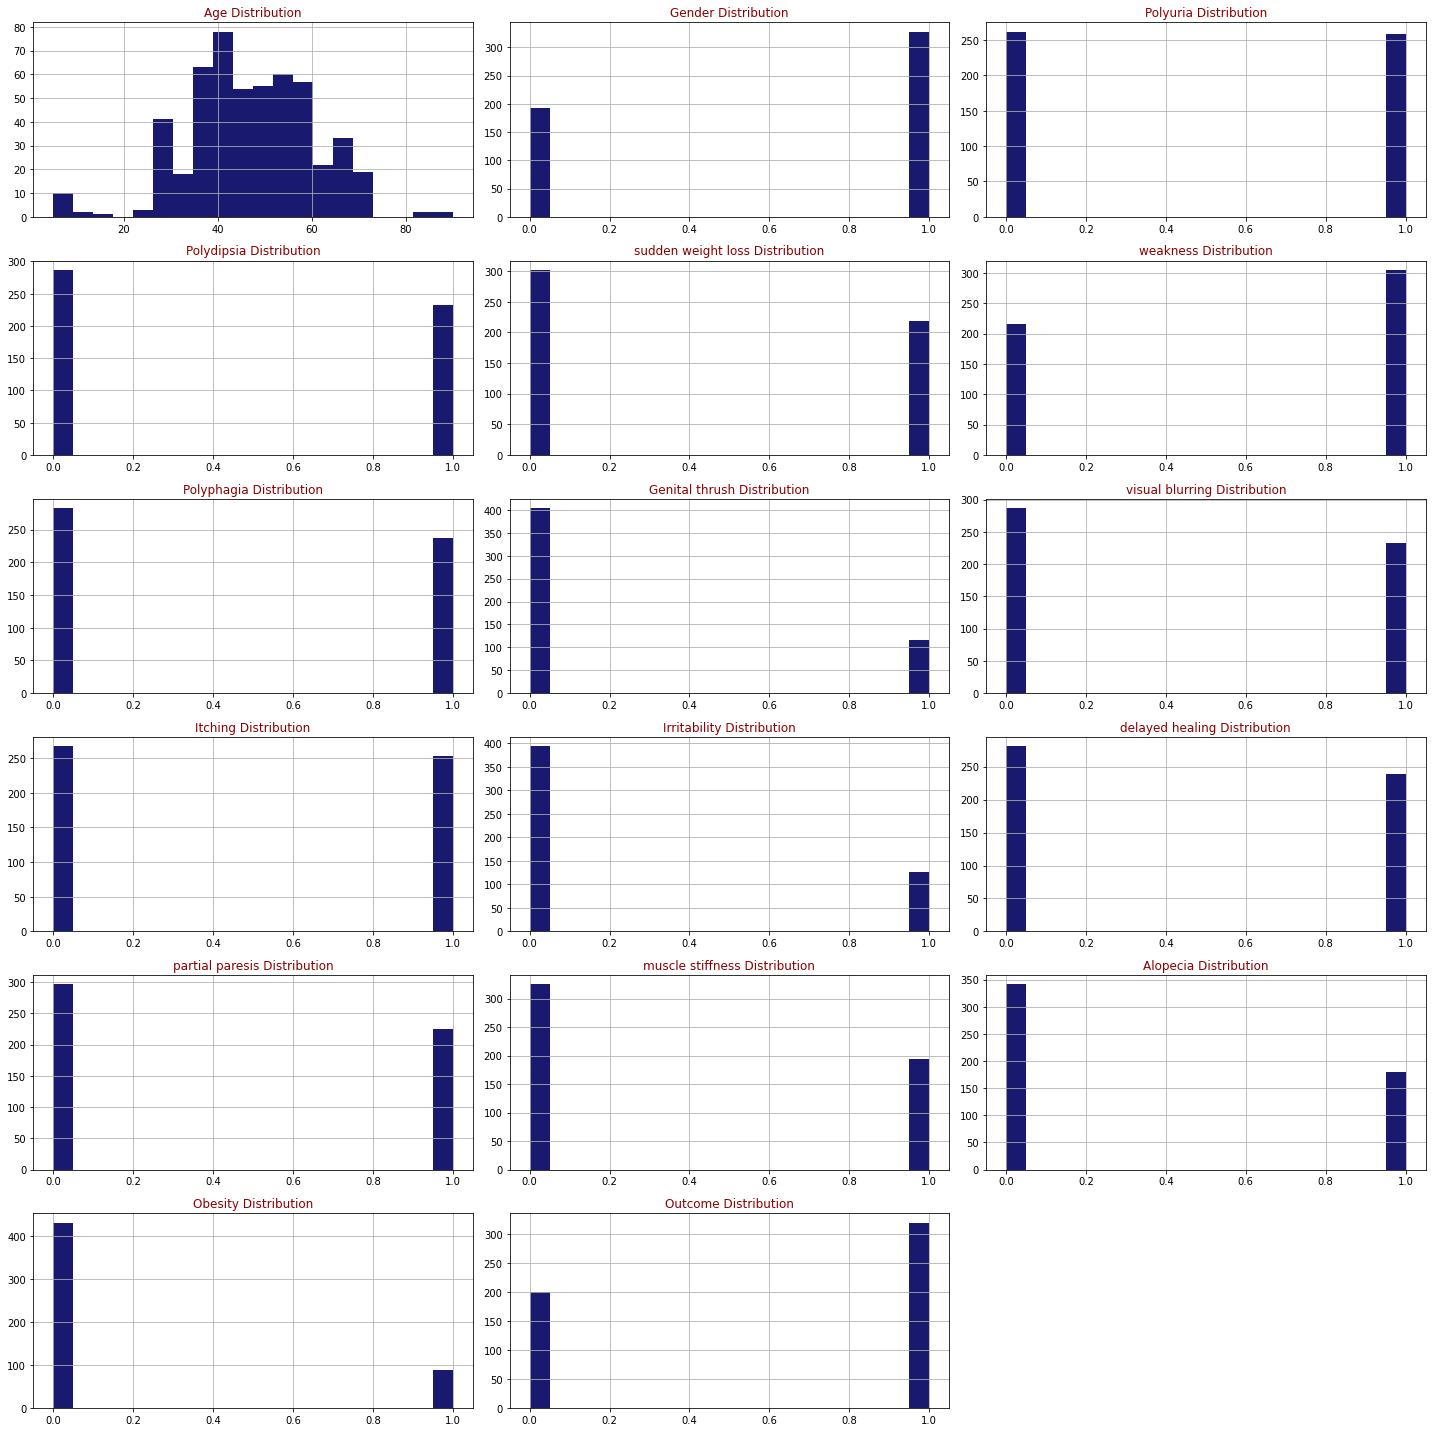

In [14]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(diab,diab.columns,6,3)